In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

### Semantic Segmentation Sandpit

In [14]:
t = []

In [15]:
for y in range(0,3):
    for x in range(0,100):
        t.append(1.0)
    for x in range(0,100):
        t.append(0.5)

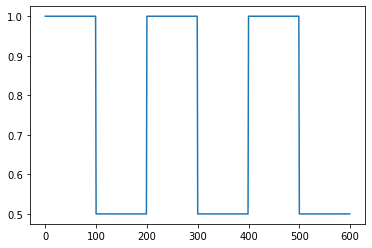

In [16]:
plt.plot(t)
plt.savefig('Segmentation_Images/Depresjon/ts_A.eps')
plt.show()

In [17]:
import sys
sys.path.append('../../../stumpy/my_stumpy/')
import stumpy
window_size = 10

In [18]:
matrix_profile = stumpy.stump(t, m=window_size)
df_matrix_profile = pd.DataFrame(matrix_profile)

/Users/tortysivill/.pyenv/versions/3.7.3/envs/entropy/lib/python3.7/site-packages/stumpy/core.py:427: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(welford_nanvar(a, w))
A large number of values are smaller than 1e-05.
For a self-join, try setting `ignore_trivial = True`.


In [19]:
df_matrix_profile

,0,1,2,3
0,0,4,-1,4
1,0,5,-1,5
2,0,6,-1,6
3,0,7,-1,7
4,0,0,0,8
...,...,...,...,...
586,0,582,582,590
587,0,583,583,-1
588,0,584,584,-1
589,0,585,585,-1


In [20]:
sliding_window = int(window_size/5)
df_matrix_profile['left_index']= matrix_profile[:,1]
proposed_change_points = []
for x in range(0,len(df_matrix_profile.index)-1):
        if df_matrix_profile['left_index'].iloc[x+1] != df_matrix_profile['left_index'].iloc[x] + 1:
            proposed_change_points.append(x)

entropy_changes = []
beginning_changes = []
end_changes = []
final_indexes = []

for x in proposed_change_points:
    final_indexes.append(x + window_size)
    
    if x < sliding_window:
        entropy_changes.append(0)
        beginning_changes.append('NA')
        end_changes.append('NA')
    else:
        window_sum = np.sum(t[x-sliding_window:x])
        next_window_sum = np.sum(t[x:x+sliding_window])

        window_entropy = sp.stats.entropy([t[y]/window_sum for y in range(x-sliding_window,x)])
        next_window_entropy = sp.stats.entropy([t[y]/next_window_sum for y in range(x,x+sliding_window)])

        entropy_changes.append(np.abs(window_entropy - next_window_entropy))
        beginning_changes.append(np.abs(t[x] - t[x+1]))
        end_changes.append(np.abs(t[x+window_size-1] - t[x+window_size]))

df_entropy_changes = pd.DataFrame()
df_entropy_changes['indexes'] = proposed_change_points
df_entropy_changes['final indexes'] = final_indexes
df_entropy_changes['relative entropies'] = entropy_changes
df_entropy_changes['beginning relative change'] = beginning_changes
df_entropy_changes['end relative change'] = end_changes

selected_indexes = []
df_entropy_sorted = df_entropy_changes.sort_values(by='relative entropies')

for x in df_entropy_sorted['indexes'][-5:]:
    selected_indexes.append(x)

In [21]:
selected_indexes

[199, 499, 99, 299, 399]

In [22]:
df_entropy_sorted[-5:]

,indexes,final indexes,relative entropies,beginning relative change,end relative change
10,199,209,0.056633,0.5,0.0
25,499,509,0.056633,0.5,0.0
7,99,109,0.056633,0.5,0.0
19,299,309,0.056633,0.5,0.0
22,399,409,0.056633,0.5,0.0


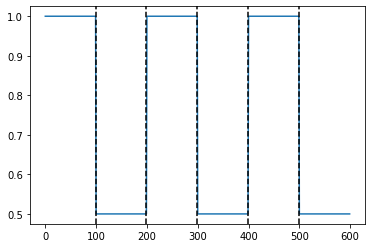

In [23]:
plt.plot(t)


for index in selected_indexes:
    plt.axvline(x=index, color ="black", linestyle="dashed")

plt.savefig('Segmentation_Images/Depresjon/ts_A_segmented.eps')

In [24]:
            
"""change_points = []           
for x in proposed_change_points:
    window_sum = np.sum(t[x:x+window_size])
    window_entropy = np.sum((y/window_sum) * np.log(y/window_sum) for y in range(x,x+window_size))
    next_window_sum = np.sum(t[x+1:x+1+window_size])
    next_window_entropy = np.sum((y/next_window_sum) * np.log(y/next_window_sum) for y in range(x+1,x+1+window_size))
    print(x)
    print("x entropy")
    print(window_entropy)
    print("x + 1 entropy")
    print(next_window_entropy)
    if window_entropy != next_window_entropy:
        change_points.append(x)"""

'change_points = []           \nfor x in proposed_change_points:\n    window_sum = np.sum(t[x:x+window_size])\n    window_entropy = np.sum((y/window_sum) * np.log(y/window_sum) for y in range(x,x+window_size))\n    next_window_sum = np.sum(t[x+1:x+1+window_size])\n    next_window_entropy = np.sum((y/next_window_sum) * np.log(y/next_window_sum) for y in range(x+1,x+1+window_size))\n    print(x)\n    print("x entropy")\n    print(window_entropy)\n    print("x + 1 entropy")\n    print(next_window_entropy)\n    if window_entropy != next_window_entropy:\n        change_points.append(x)'

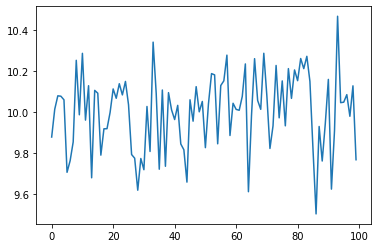

In [25]:
mu, sigma = 10, 0.2 # mean and standard deviation
s1 = np.random.normal(mu, sigma, 100)

plt.plot(s1)




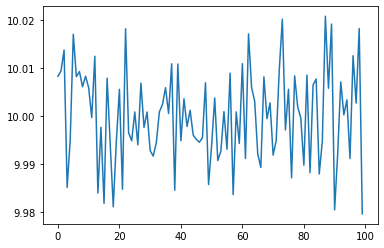

In [26]:
mu, sigma = 10, 0.01 # mean and standard deviation
s2 = np.random.normal(mu, sigma, 100)

plt.plot(s2)

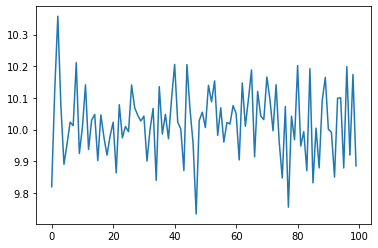

In [27]:
mu, sigma = 10, 0.1 # mean and standard deviation
s3 = np.random.normal(mu, sigma, 100)

plt.plot(s3)

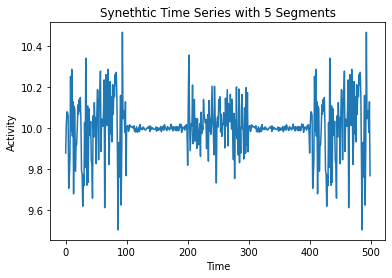

In [32]:
s = list(s1) + list(s2) + list(s3) + list(s2) + list(s1)

plt.plot(s)
plt.title("Synethtic Time Series with 5 Segments")
plt.xlabel("Time")
plt.ylabel("Activity")
plt.savefig('Segmentation_Images/Depresjon/ts_B.eps')


In [560]:
import math
def roundup(x):
    return int(math.ceil(x / 20.0)) * 20

In [561]:
#TODO: FIX THIS TO A ROLLING AVERAGE 
sliding_window = int(window_size/5)
window_size = 25 # 500/20 
t = s
matrix_profile = stumpy.stump(t, m=window_size)
df_matrix_profile = pd.DataFrame(matrix_profile)

df_matrix_profile['left_index']= matrix_profile[:,1]
proposed_change_points = []


for x in range(0,len(df_matrix_profile.index)-1):
        if df_matrix_profile['left_index'].iloc[x+1] != df_matrix_profile['left_index'].iloc[x] + 1:
            proposed_change_points.append(x)

entropy_changes = []
beginning_changes = []
end_changes = []
final_indexes = []

for x in proposed_change_points:
    final_indexes.append(x + window_size)
    
    if x < sliding_window:
        entropy_changes.append(0)
        beginning_changes.append('NA')
        end_changes.append('NA')
        
    else:
        window_sum = np.sum(t[x-sliding_window:x])
        next_window_sum = np.sum(t[x:x+sliding_window])

        window_entropy = sp.stats.entropy([t[y]/window_sum for y in range(x-sliding_window,x)])
        next_window_entropy = sp.stats.entropy([t[y]/next_window_sum for y in range(x,x+sliding_window)])

        entropy_changes.append(np.abs(window_entropy - next_window_entropy))
        beginning_changes.append(np.abs(t[x] - t[x+1]))
        if x > len(t) - window_size - 2:
            end_changes.append(np.abs(t[x+window_size] - t[x+window_size-10]))
        else:
            end_changes.append(np.abs(t[x+window_size] - t[x+window_size+1]))
        
df_entropy_changes = pd.DataFrame()
df_entropy_changes['indexes'] = proposed_change_points
df_entropy_changes['final indexes'] = final_indexes
df_entropy_changes['relative entropies'] = entropy_changes
df_entropy_changes['beginning relative change'] = beginning_changes
df_entropy_changes['end relative change'] = end_changes

df_entropy_changes = df_entropy_changes[df_entropy_changes['relative entropies'] != 0]

df_entropy_sorted = df_entropy_changes.sort_values(by='relative entropies')


selected_indexes = []

for x in df_entropy_sorted['indexes'].iloc[len(df_entropy_sorted['indexes'])-50: len(df_entropy_sorted['indexes'])]:
    selected_indexes.append(x)

'for index in selected_indexes_smaller:\n    plt.axvline(x=index, color = "red", linestyle="dashed")\n    \nfor index in selected_indexes_smallest:\n    plt.axvline(x=index, color = "green", linestyle="dashed")'

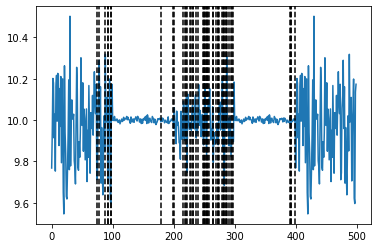

In [562]:
plt.plot(t)


for index in selected_indexes:
    plt.axvline(x=index, color = "black", linestyle="dashed")

"""for index in selected_indexes_smaller:
    plt.axvline(x=index, color = "red", linestyle="dashed")
    
for index in selected_indexes_smallest:
    plt.axvline(x=index, color = "green", linestyle="dashed")"""

In [563]:
def normalise(X):
    return [(x - min(X))/(max(X)-min(X)) for x in X]

In [564]:
import math
def roundup(x):
    return int(math.ceil(x / 20.0)) * 20

In [33]:
#TODO: FIX THIS TO A ROLLING AVERAGE 

window_size = 20 # 500/10 
sliding_window = int(window_size*2)

t = s
matrix_profile = stumpy.stump(t, m=window_size)
df_matrix_profile = pd.DataFrame(matrix_profile)

df_matrix_profile['left_index']= matrix_profile[:,1]
proposed_change_points = []


for x in range(0,len(df_matrix_profile.index)-1):
        if df_matrix_profile['left_index'].iloc[x+1] != df_matrix_profile['left_index'].iloc[x] + 1:
            proposed_change_points.append(x)

entropy_changes = []
beginning_changes = []
end_changes = []
final_indexes = []

for x in proposed_change_points:
    final_indexes.append(x + window_size)
    
    window_sum = np.sum(t[x-sliding_window:x])
    next_window_sum = np.sum(t[x:x+sliding_window])

    window_entropy = np.sum(normalise([t[y] for y in range(x-sliding_window,x)]))
    next_window_entropy = np.sum(normalise([t[y] for y in range(x,x+sliding_window)]))

    entropy_changes.append(np.abs(window_entropy - next_window_entropy))
    
    beginning_changes.append(np.abs(t[x] - t[x+1]))
    if x > len(t) - window_size - 2:
        end_changes.append(np.abs(t[x+window_size] - t[x+window_size-10]))
    else:
        end_changes.append(np.abs(t[x+window_size] - t[x+window_size+1]))
        
df_entropy_changes = pd.DataFrame()
df_entropy_changes['indexes'] = proposed_change_points
df_entropy_changes['final indexes'] = final_indexes
df_entropy_changes['relative entropies'] = entropy_changes
df_entropy_changes['beginning relative change'] = beginning_changes
df_entropy_changes['end relative change'] = end_changes

df_entropy_changes = df_entropy_changes[df_entropy_changes['relative entropies'] != 0]

df_entropy_sorted = df_entropy_changes.sort_values(by='relative entropies')


selected_indexes = []

for x in df_entropy_sorted['indexes'].iloc[len(df_entropy_sorted['indexes'])-8: len(df_entropy_sorted['indexes'])]:
    selected_indexes.append(roundup(x))

NameError: name 'normalise' is not defined

'for index in selected_indexes_smaller:\n    plt.axvline(x=index, color = "red", linestyle="dashed")\n    \nfor index in selected_indexes_smallest:\n    plt.axvline(x=index, color = "green", linestyle="dashed")'

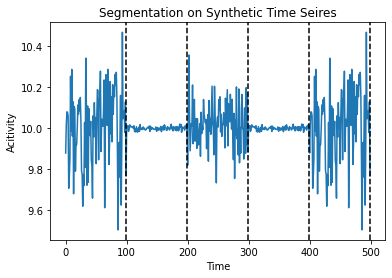

In [35]:
plt.plot(t)


for index in selected_indexes:
    plt.axvline(x=index, color = "black", linestyle="dashed")
    

plt.title("Segmentation on Synthetic Time Seires")
plt.xlabel("Time")
plt.ylabel("Acitivity")
plt.savefig('Segmentation_Images/Depresjon/ts_B_segmented.eps')

"""for index in selected_indexes_smaller:
    plt.axvline(x=index, color = "red", linestyle="dashed")
    
for index in selected_indexes_smallest:
    plt.axvline(x=index, color = "green", linestyle="dashed")"""